In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import yfinance as yf
import fredapi as fa
from datetime import date, timedelta
from Sector_Exposure import Rate_Exposures
import numpy as np
import matplotlib.pyplot as plt
import Useful_Functions as u
from statsmodels.tsa.stattools import adfuller

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')

#useful.current_rates("m", descrip=False)

In [2]:


u.update_data()



materials
industrials
consumer-discretionaries
consumer-staples
healthcare
financials
technology
telecom
utilities
real-estate


In [4]:


current_daily = u.current_rates("d", False)

current_monthly = u.current_rates("m", False)

current_monthly, current_daily



((3.0, -1.0), (2.0, -4.0))

In [3]:


def update_data(compare_group = None):
    
    assert compare_group
    
    fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')
    
    # "ten", "two",
    sector_names = ['Materials', 'Industrials', 'Consumer Discretionary', 
                        'Consumer Staples', 'Health Care',
                        'Financials', 'Information Technology', 
                        'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', "Aerospace",
                        "SP-500", "Real Yield", "Yield Curve"]
    
    # "ten", "two",
    factor_names = ['Value', 'Quality', 'Size', 'Default', "Real Yield", "Yield Curve"]
    
    if 'sector' in compare_group.lower():
        
        d = "1980-01-04"
        
        sec = yf.download([f"^SP500-{i}" for i in range(15,65,5)], start = d, progress=False)["Close"]
        sec['Energy'] = yf.download(["^GSPE"], start = d, progress=False)["Close"]
        sec['Semiconductors'] = yf.download(["SOXX"], start = d, progress=False)["Close"]
        sec['Aerospace'] = yf.download(["ITA"], start = d, progress=False)["Close"]
        sec['SP-500'] = yf.download("^GSPC", start = d, progress=False)["Close"]
        sec['Real Yield'] = fred.get_series('DFII10', observation_start = d, end = date.today())
        sec['Yield Curve'] = fred.get_series('T10Y2Y', observation_start = d, end = date.today())
        
    if 'factor' in compare_group.lower():
        
        fact = pd.DataFrame()
        fact['Value'] = yf.download(["VLUE"], start = d, progress=False)["Close"]
        fact['Quality'] = yf.download(["QUAL"], start = d, progress=False)["Close"]
        fact['Size'] = yf.download(["SIZE"], start = d, progress=False)["Close"]
        fact['Default'] = yf.download(["FIBR"], start = d, progress=False)["Close"]
        fact['Real Yield'] = sec['Real Yield']
        fact['Yield Curve'] = sec['Yield Curve']
    
    #sec['ten'] = fred.get_series('DGS10', observation_start = d, end = date.today())
    #sec['two'] = fred.get_series('DGS2', observation_start = d, end = date.today())
    
    if 'sector' in compare_group.lower():
        sec.columns = sector_names
        return sec.dropna()
    
    if 'factor' in compare_group.lower():
        sec.columns = factor_names
        return sec.dropna()


#factor_df = update_data('factors')
#sector_df = update_data('sectors')



In [4]:


factor_df = pd.read_csv("factors_and_rates.csv", index_col="Date")

sector_df = pd.read_csv("sectors_and_rates.csv", index_col="Date")

factors_and_scores = pd.read_excel("factors_and_scores.xlsx", index_col = "Date")
factors_and_scores

sector_df

,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,Semiconductors,Aerospace,SP-500,Real Yield,Yield Curve
Date,,,,,,,,,,,,,,,,
2010-01-04,205.360001,247.110001,236.460007,277.000000,367.260010,197.789993,376.459991,116.260002,158.240005,93.790001,442.079987,49.830002,26.125000,1132.989990,1.47,2.76
2010-01-05,206.429993,247.990005,237.619995,276.700012,365.149994,201.149994,376.329987,116.639999,156.509995,94.040001,445.600006,49.750000,26.275000,1136.520020,1.43,2.76
2010-01-06,209.570007,248.490005,237.589996,276.350006,366.890015,202.000000,373.029999,113.169998,157.279999,93.839996,450.200012,49.599998,26.510000,1137.140015,1.48,2.84
2010-01-07,208.610001,251.720001,239.630005,276.279999,368.260010,206.210007,371.600006,112.209999,156.429993,94.949997,449.200012,49.209999,26.580000,1141.689941,1.44,2.82
2010-01-08,210.750000,255.559998,239.600006,274.869995,369.350006,205.089996,374.529999,111.699997,156.229996,93.720001,451.470001,49.950001,26.730000,1144.979980,1.41,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,542.460022,805.429993,1200.560059,764.479980,1510.430054,577.809998,2442.379883,200.460007,375.720001,273.959991,676.929993,421.010010,104.019997,4108.540039,0.22,0.30
2022-06-06,547.729980,808.669983,1212.900024,764.900024,1510.380005,580.020020,2443.409912,202.419998,377.410004,273.160004,676.159973,421.739990,104.449997,4121.430176,0.28,0.31
2022-06-07,551.690002,819.640015,1208.400024,768.109985,1530.060059,584.010010,2473.110107,203.449997,379.589996,276.309998,697.380005,425.109985,106.919998,4160.680176,0.25,0.23


In [220]:

#factor_exposure = Rate_Exposures(factor_df, 252, 60, ['Real Yield', 'Yield Curve'], "SP-500")

sector_exposure = Rate_Exposures(sector_df, 252, 30, ['Real Yield', 'Yield Curve'], "SP-500")


In [222]:


sector_exposure.mean_returns



Materials  Industrials  Consumer Discretionary  Consumer Staples  \
-8  1  -0.029449    -0.052537                0.087238         -0.074709   
-7 -6  -0.070786    -0.021072                0.024352          0.034876   
    1   0.013543    -0.054682                0.087348         -0.093425   
    2  -0.029617    -0.096662                0.054680          0.013602   
-6 -5  -0.055266    -0.023214                0.026144          0.028737   
...          ...          ...                     ...               ...   
 7  4  -0.028395     0.005331                0.025652         -0.006350   
    5   0.024517     0.008410                0.019287         -0.010524   
 8  4  -0.019489     0.005499                0.023221         -0.016044   
    5  -0.024948     0.008369                0.028956         -0.007060   
    6   0.007444     0.010935                0.021860         -0.013988   

       Health Care  Financials  Technology  Telecomm  Utilities  Real Estate  \
-8  1    -0.011901   -0.122932    0.070907  0.077914  -0.135917    -0.141183   
-7 -6     0.043999   -0.056146    0.027082  0.009848   0.079853    -0.015403   
    1    -0.016891   -0.083646    0.054585  0.057181  -0.107374    -0.112486   
    2     0.081881   -0.085558    0.040590  0.016161  -0.076461    -0.084465   
-6 -5     0.031333   -0.056501    0.026031  0.023153   0.086226    -0.011997   
...            ...         ...         ...       ...        ...          ...   
 7  4     0.005815    0.006029   -0.024471 -0.019295   0.009345    -0.032555   
    5     0.012671   -0.006116   -0.002501 -0.074767  -0.007690    -0.067235   
 8  4     0.015188    0.015284   -0.031769 -0.041935   0.011583    -0.010734   
    5     0.017975    0.012178   -0.027782 -0.041085   0.017928    -0.030760   
    6     0.005718   -0.001579   -0.004488 -0.065813  -0.010014    -0.068996   

         Energy  Semiconductors  Aerospace  
-8  1  0.053522        0.065085  -0.075319  
-7 -6 -0.059091        0.032053   0.025299  
    1  0.059714        0.033422  -0.069109  
    2 -0.160195        0.030623  -0.166987  
-6 -5 -0.048477        0.041824   0.012763  
...         ...             ...        ...  
 7  4 -0.009505        0.005684   0.049727  
    5 -0.005747       -0.034427   0.053064  
 8  4  0.007463       -0.007742   0.056025  
    5 -0.014191       -0.023976   0.053485  
    6 -0.007806       -0.035940   0.066683  

[144 rows x 13 columns]

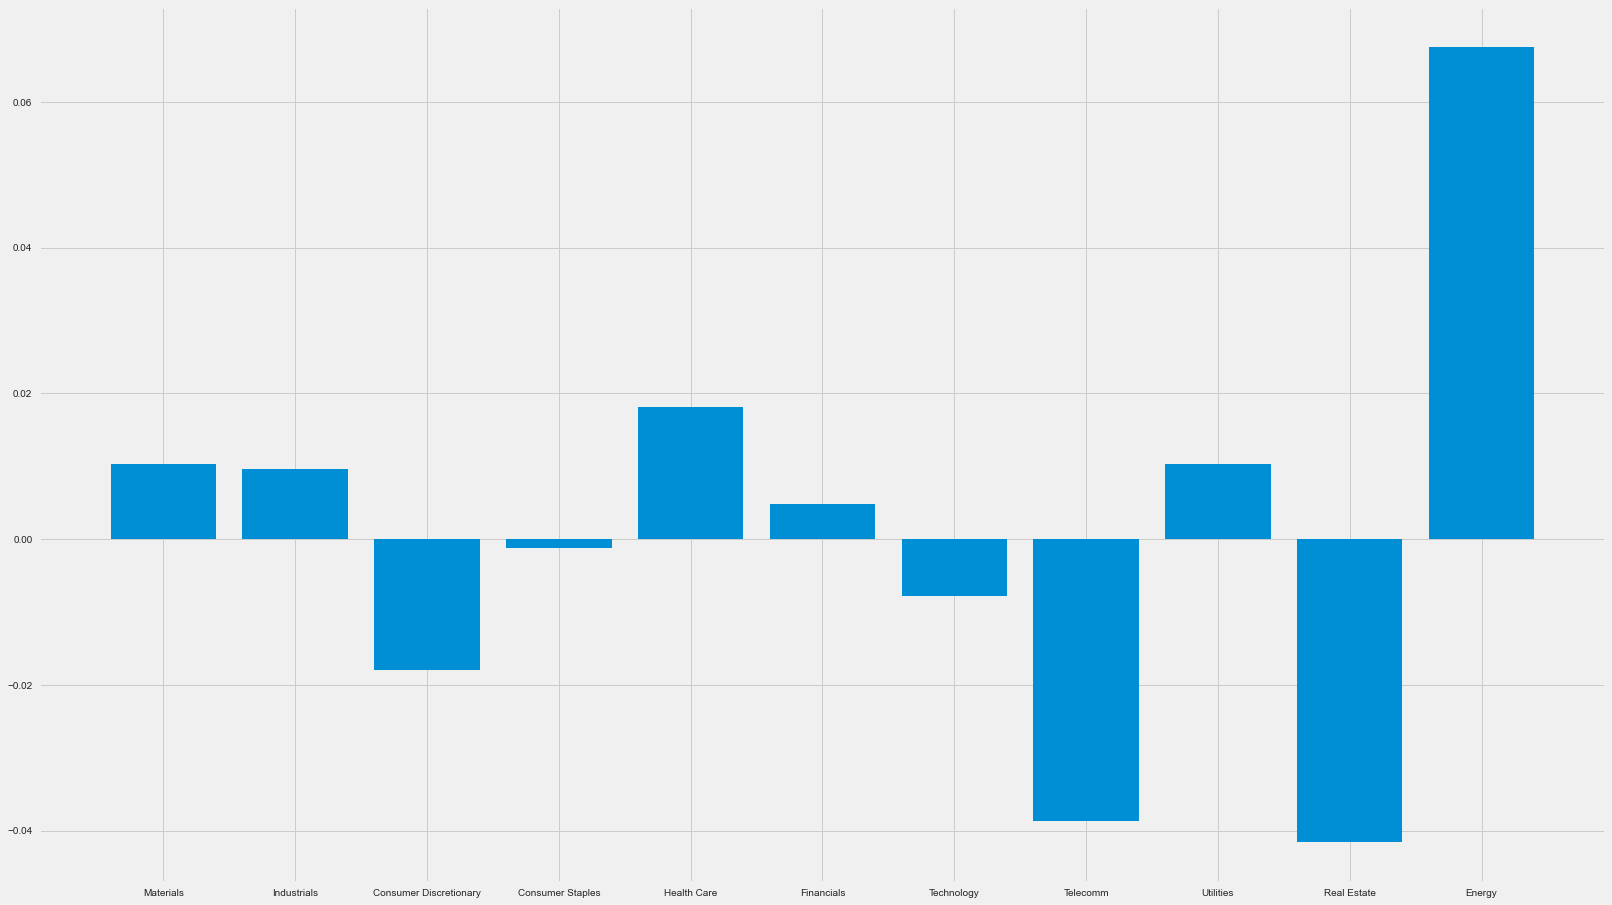

In [223]:


#sector_exposure.ry_mean_returns.iloc[:,:-2].to_excel("ry_mean_returns_per_sector.xlsx")
#sector_exposure.yc_mean_returns.iloc[:,:-2].to_excel("yc_mean_returns_per_sector.xlsx")



#sector_exposure.ry_total_returns[4]

ok = sector_exposure.ry_mean_returns.iloc[-3,:-2]
u.barplot_1d(ok, size=(25,15))


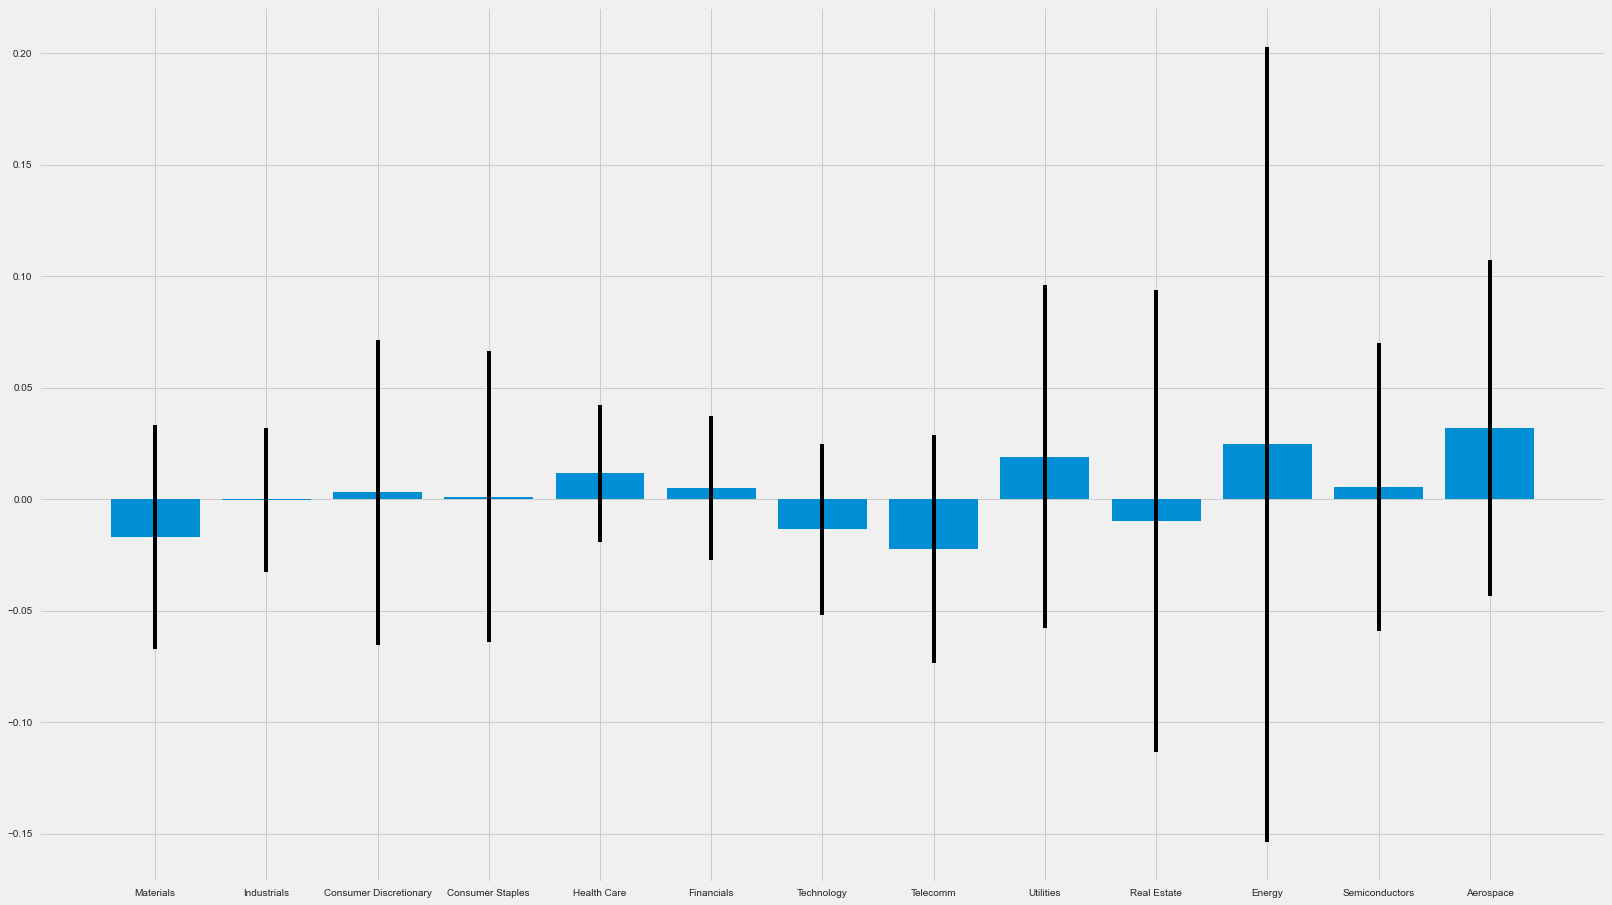

In [224]:


#current_daily

hypotheticals = [(4,-2), (4, -1), (4,0), (5,1), (5,3), (6,2), (6,3), (7,3), (7,4), (8,4)]

heard_hypothetical = sector_exposure.mean_returns.loc[hypotheticals].mean()

new = sector_exposure.mean_returns.loc[(1,1)]

all_hypos = {}
stds = pd.DataFrame(columns = sector_exposure.mean_returns.columns)
eh = {hype : {} for hype in hypotheticals}

for hype in hypotheticals:
    
    # ['mean']
    all_hypos[hype] = sector_exposure.total_returns[hype].mean()
    eh[hype]['mean'] = sector_exposure.total_returns[hype].mean()
    eh[hype]['std'] = sector_exposure.total_returns[hype].std()*2
    #all_hypos[hype]['std_95_confidence'] = sector_exposure.total_returns[hype].std()*2
    stds = stds.append(sector_exposure.total_returns[hype])

stds_95_confidence = stds.std()*2

all_hypos = pd.DataFrame(all_hypos)

u.barplot_1d(heard_hypothetical, stds_series = stds_95_confidence, size = (25,15))

#u.barplot_1d(new, stds_series = sector_exposure.total_returns[(1,1)].std(), size = (25,15))

In [257]:


def closest_combos(combo, in_index = False):

    assert isinstance(combo, tuple)
    
    min_error = 100
    errors = {}

    for rates in sector_exposure.mean_returns.index:
        
        ry_error = abs(combo[0] - rates[0])
        yc_error = abs(combo[1] - rates[1])
        error = ry_error + yc_error
         
        errors[rates] = error
        
        if error <= min_error and error > 0:
            min_error = error
    
    mins = list(filter(lambda x: errors[x]==min_error, errors))
    
    if in_index:
        mins.append(combo)
    
    if len(mins) <= 2:
        
        more_mins = list(filter(lambda x: errors[x]==min_error+1, errors))
        
        extended = list( set(mins).union(set(more_mins)) )
        
        if len(extended) <= 3:
            
            even_more_mins = list(filter(lambda x: errors[x]==min_error+2, errors))
            
            return list( set(more_mins).union(set(even_more_mins)) )
        
        return extended
    
    return mins



NormaltestResult(statistic=18.000714178412686, pvalue=0.0001233657436449056)


-0.008354489840060906

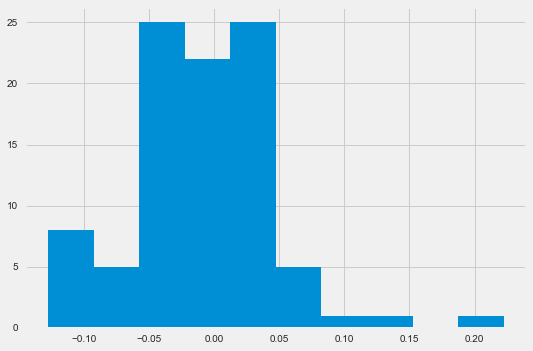

In [298]:
from scipy.stats.mstats import normaltest


#normaltest()

# (2,1)

ok = sector_exposure.total_returns[(0,1)][u.en]

print(normaltest(ok))

ok.hist()
ok.mean()

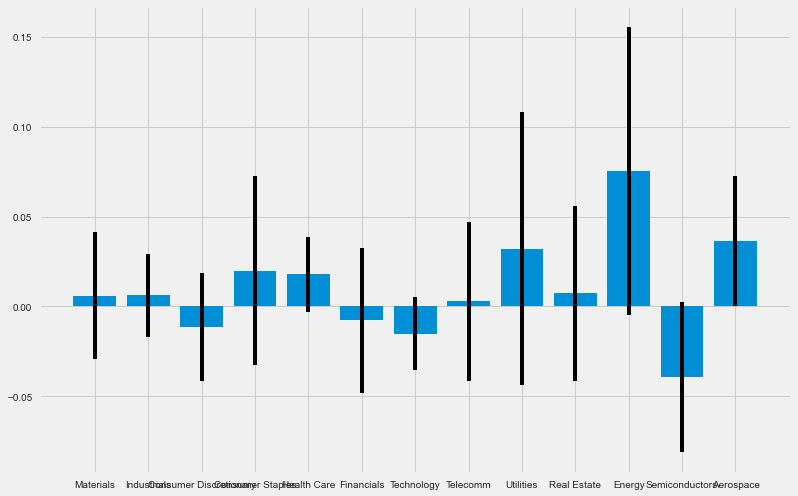

[(1, -4), (2, -5), (2, -3), (3, -4)]

In [259]:

close = closest_combos(current_daily)

stds = pd.DataFrame(columns = sector_exposure.mean_returns.columns)

for hype in close:
    stds = stds.append(sector_exposure.total_returns[hype])
stds_95_confidence = stds.std()*2
m = stds.mean()

u.barplot_1d(m, stds_95_confidence)

close


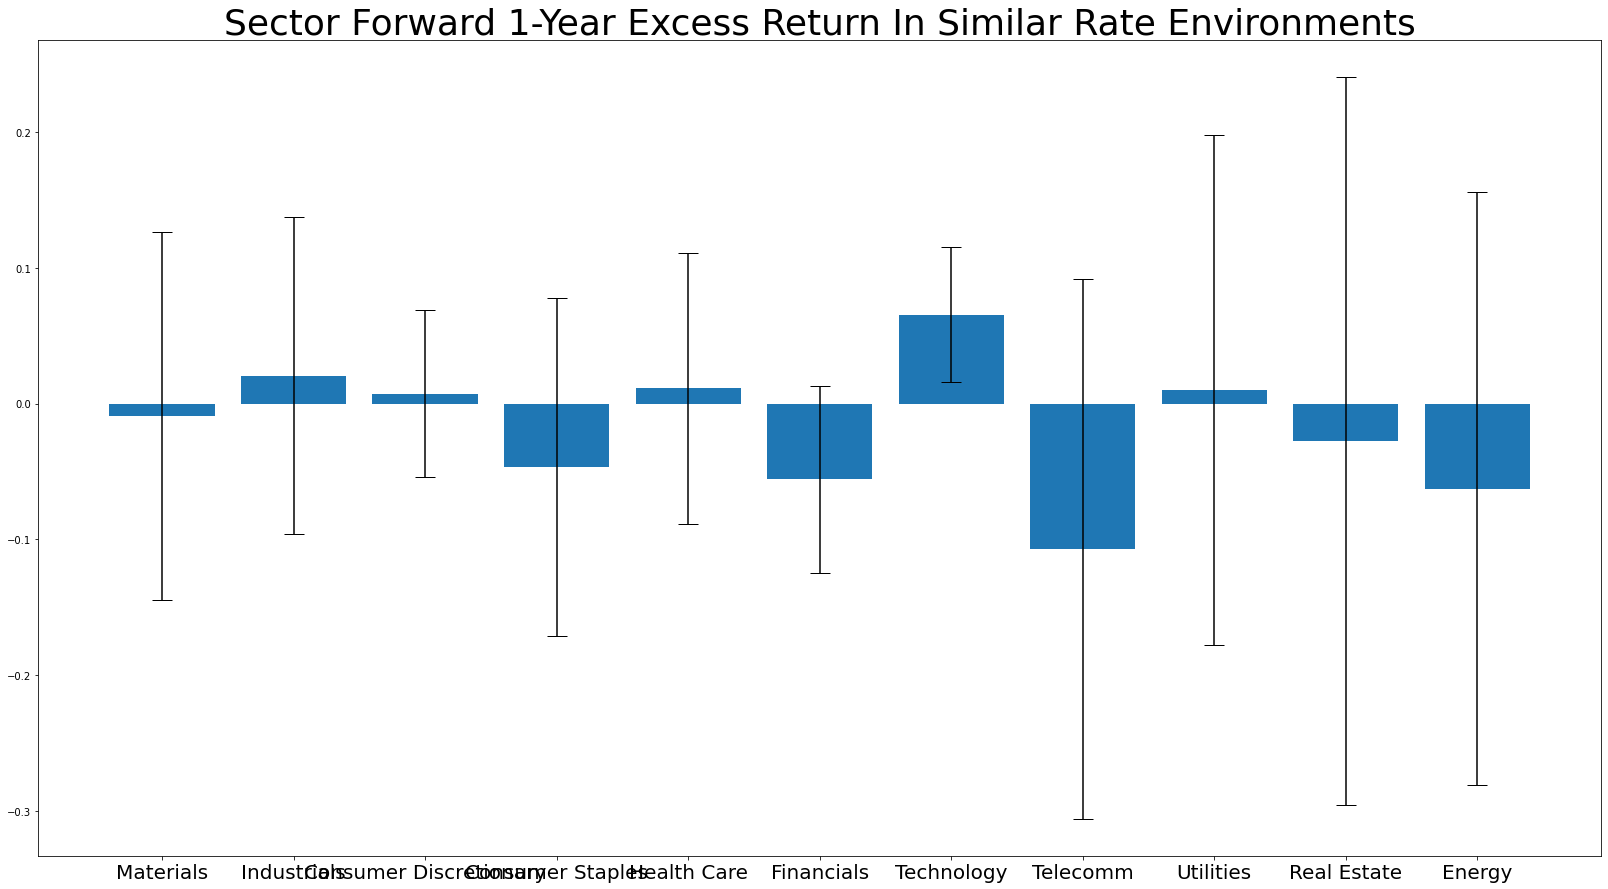

In [174]:

sector_names = ['Materials', 'Industrials', 'Consumer Discretionary', 
                        'Consumer Staples', 'Health Care',
                        'Financials', 'Technology', 
                        'Telecomm', 'Utilities', 'Real Estate', 'Energy']

shortened_sector_names = ['Mats', 'Ind', 'CD', 
                        'CS', 'HC',
                        'Fin', 'Tech', 
                        'Comm', 'Ut', 'RE', 'En']


plt.figure(figsize=(28,15))
plt.bar(heard_hypothetical.index[:-2], heard_hypothetical[:-2], yerr = stds_95_confidence[:-2], capsize = 10)
plt.title("Sector Forward 1-Year Excess Return In Similar Rate Environments", size = 36)
plt.xticks(sector_names, size = 20)
plt.show()
#plt.xlabel(sector_names)

c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\Rhys Logan\AppData\Local\Temp\ipykernel_15188\4189029310.py:29: UserWarning: This figure includ

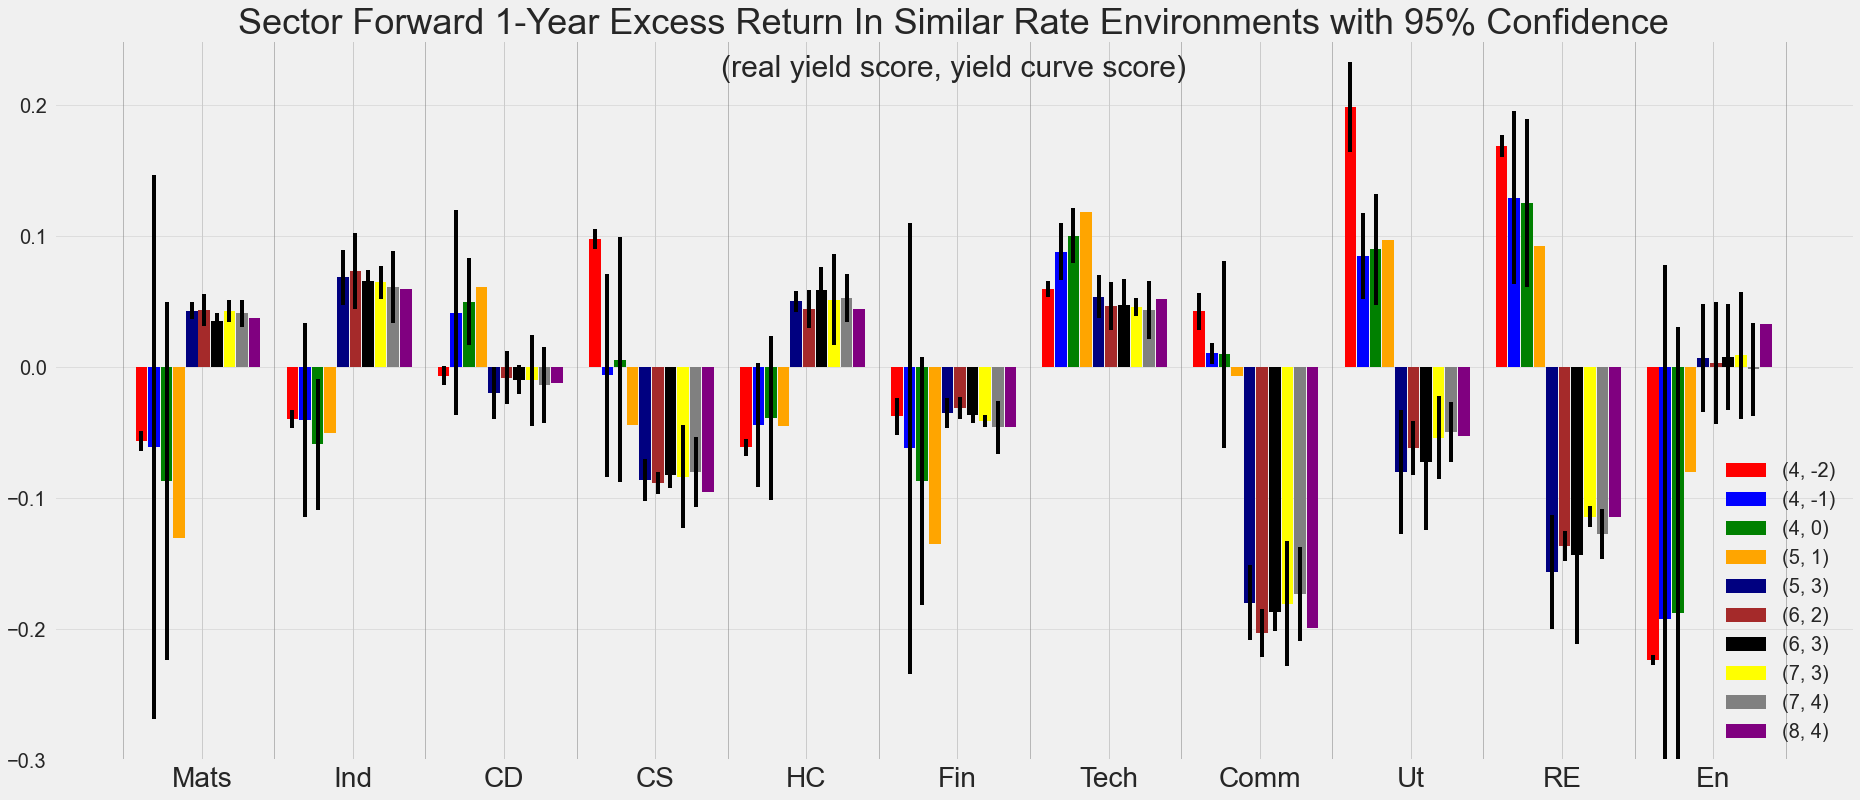

In [219]:

data = eh


X = np.arange(11)
shift = np.array([i + .4 for i in X])

#plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(25,10))

ax = fig.add_axes([0,0,1,1])

c = ['red', 'blue', 'green', 'orange', 'navy', 'brown', 'black', 'yellow', 'grey', 'purple', 'pink']

for num, (e, n) in enumerate(zip(data, np.linspace(0,1,13))):
    
    ax.bar(X + n, data[e]['mean'][:-2], color = c[num], width = 1/13, yerr = data[e]['std'][:-2], capsize = 5)
    
plt.legend([i for i in hypotheticals], prop={'size': 20})
plt.yticks(size = 20)
for i in np.arange(-1,11):
    plt.axvline(i + 1 - .12, color = 'grey', linewidth = .5)

plt.xticks(np.array(shift), shortened_sector_names, size = 28)
plt.title("Sector Forward 1-Year Excess Return In Similar Rate Environments with 95% Confidence", size = 36)
plt.suptitle("(real yield score, yield curve score)", size = 30)
plt.grid(axis='y', linewidth = .5)
plt.ylim((-.3,.25))
plt.tight_layout()
plt.show()


In [210]:

plt.style.library.keys()


dict_keys(['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test_patch', '_mpl-gallery-nogrid', '_mpl-gallery'])

In [26]:

#sector_exposure.show_return_distribution(False, "Real Estate", (3,-1))


sector_exposure.total_returns[(3,-1)]['Real Estate'].sort_values()



2018-05-14   -0.020249
2015-08-18   -0.012767
2018-12-14   -0.005710
2018-12-13    0.011308
2018-02-15    0.015467
2018-12-12    0.020058
2014-12-23    0.027128
2015-12-16    0.027142
2015-09-08    0.028132
2015-12-15    0.029453
2018-03-08    0.029987
2018-03-09    0.034621
2018-11-06    0.062121
2018-10-23    0.073716
2018-10-31    0.076522
2018-09-18    0.084511
2018-10-18    0.084567
2018-09-19    0.103594
Name: Real Estate, dtype: float64

In [9]:


corr = sector_exposure.get_correlation_x_days_after_signal(60)
betas = sector_exposure.get_betas_x_days_after_signal(30)



In [13]:



betas.mean()
corr.mean()



Materials  Industrials  Consumer Discretionary  Consumer Staples  \
-6 -5   0.989532     0.995547                1.008118          0.883596   
   -4   0.962996     0.983451                0.996249          0.862267   
   -3   0.803236     0.922395                0.911828          0.831358   
   -2   0.858974     0.946690                0.928765          0.844484   
    2   0.465347     0.672130                0.884620          0.517238   
...          ...          ...                     ...               ...   
 6  1   0.917701     0.952178                0.899677          0.720153   
    2   0.941064     0.949020                0.926189          0.810686   
    3   0.914782     0.892939                0.884917          0.783869   
    4   0.940313     0.963033                0.951990          0.827402   
    5   0.928577     0.974258                0.980228          0.859411   

       Health Care  Financials  Information Technology  \
-6 -5     0.984641    0.933416                1.000709   
   -4     0.968283    0.935475                0.976776   
   -3     0.893095    0.744637                0.864974   
   -2     0.886174    0.750208                0.879552   
    2     0.706836    0.768846                0.816059   
...            ...         ...                     ...   
 6  1     0.878254    0.948722                0.956455   
    2     0.887471    0.914077                0.922453   
    3     0.846996    0.911399                0.827766   
    4     0.908065    0.861130                0.934601   
    5     0.869051    0.880278                0.940342   

       Telecommunication Services  Utilities  Real Estate    Energy  \
-6 -5                    0.854187   0.834785     0.952557  1.002785   
   -4                    0.829673   0.813105     0.978911  0.973121   
   -3                    0.765083   0.706731     0.746127  0.898596   
   -2                    0.882996   0.728895     0.743737  0.916891   
    2                    0.686460   0.190902     0.363267  0.354387   
...                           ...        ...          ...       ...   
 6  1                    0.889307   0.636668     0.812657  0.628327   
    2                    0.858357   0.728108     0.737752  0.810025   
    3                    0.714196   0.641896     0.654855  0.855071   
    4                    0.801497   0.749880     0.673957  0.905106   
    5                    0.716001   0.708982     0.670194  0.822628   

       Semiconductors  Aerospace  
-6 -5        0.934212   0.986607  
   -4        0.925002   0.981798  
   -3        0.579288   0.856686  
   -2        0.615429   0.841687  
    2        0.403427   0.586033  
...               ...        ...  
 6  1        0.857779   0.842374  
    2        0.852548   0.892010  
    3        0.773990   0.856775  
    4        0.849974   0.934805  
    5        0.856559   0.905604  

[142 rows x 13 columns]

In [5]:

# .iloc[:,:-2]

,DEFAULT,QUALITY,MOMENTUM,BOOK_TO_PRICE,SIZE,CASH_TO_ASSETS,Real Yield_scores,Yield Curve_scores
Date,,,,,,,,
2011-02-10,-0.1495,0.0886,-0.0021,0.0025,-0.0523,0.0101,3,2
2011-02-11,-0.1588,0.1091,-0.0002,0.0090,-0.0527,0.0060,2,1
2011-02-14,-0.1776,0.1124,-0.0027,0.0057,-0.0471,0.0004,1,0
2011-02-15,-0.1631,0.1311,-0.0020,0.0102,-0.0536,0.0104,1,1
2011-02-16,-0.1534,0.1258,-0.0035,0.0086,-0.0559,0.0193,2,1
...,...,...,...,...,...,...,...,...
2021-02-22,0.0546,0.1196,-0.0813,0.4447,-0.2234,-0.4679,1,5
2021-02-23,0.0010,0.1570,-0.0386,0.4314,-0.2294,-0.4430,1,5
2021-02-24,-0.0264,0.1612,-0.0159,0.4342,-0.2042,-0.4265,1,4


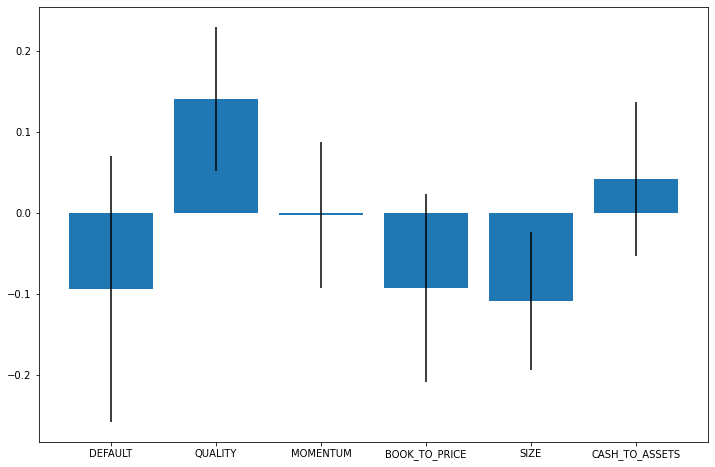

DEFAULT           0.163998
QUALITY           0.089181
MOMENTUM          0.089630
BOOK_TO_PRICE     0.115846
SIZE              0.085096
CASH_TO_ASSETS    0.094919
dtype: float64

In [9]:


'''

different_types = {"Very Negative" : [-6,-5,-4], "Slightly Negative" : [-3,-2], "Neutral" : [-1, 0, 1], "Slightly Positive" : [2,3], "Very Positive" : [4,5,6]}
rets_based_on_combination_type = {"Very Negative" : {i : pd.DataFrame() for i in different_types}, "Slightly Negative" : {i : pd.DataFrame() for i in different_types}, 
                                  "Neutral" : {i : pd.DataFrame() for i in different_types}, 
                                  "Slightly Positive" : {i : pd.DataFrame() for i in different_types}, "Very Positive" : {i : pd.DataFrame() for i in different_types}}

mean_rets_based_on_combination_type = {"Very Negative" : {i : pd.DataFrame() for i in different_types}, "Slightly Negative" : {i : pd.DataFrame() for i in different_types}, 
                                  "Neutral" : {i : pd.DataFrame() for i in different_types}, 
                                  "Slightly Positive" : {i : pd.DataFrame() for i in different_types}, "Very Positive" : {i : pd.DataFrame() for i in different_types}}

for s1 in range(-6,7):

    for s2 in range(-6,7):
        
        for k2 in different_types:
            
            if s2 in different_types[k2]:
                
                for k1 in different_types:
                    
                    if s1 in different_types[k1]:
                        
                        try:
                            rets_based_on_combination_type[k1][k2] = rets_based_on_combination_type[k1][k2].append(mean_rets.loc[(s1,s2)])
                            mean_rets_based_on_combination_type[k1][k2] = mean_rets_based_on_combination_type[k1][k2].append(mean_rets.loc[(s1,s2)])
                        except:
                            #rets_based_on_combination_type[k1][k2] = None
                            pass


#mean_rets_based_on_combination_type = rets_based_on_combination_type.copy()

#winners_based_on_combination_type = rets_based_on_combination_type.copy()

cols = []

for k1 in rets_based_on_combination_type:
    
    for k2 in rets_based_on_combination_type[k1]:
        
        mean_rets_based_on_combination_type[k1][k2] = mean_rets_based_on_combination_type[k1][k2].mean()
        
        #try:
            #winners_based_on_combination_type[k1][k2] = winners_based_on_combination_type[k1][k2].sort_values(ascending=False).index[0]
        #except:
            #winners_based_on_combination_type[k1][k2] = 'No Data'
        
        cols.append((k1,k2))

'''


factors_and_scores = factors_and_scores.dropna()

total_rets = exposure_report.get_return_data(factors_and_scores)
mean_rets = pd.DataFrame({s : total_rets[s].mean() for s in total_rets})

mean_rets = mean_rets.T

useful.barplot_1d(mean_rets.loc[current_monthly], total_rets[current_monthly].std())


#plt.figure(figsize = (12,8))
#plt.bar(mean_rets.loc[current_monthly].index, mean_rets.loc[current_monthly], yerr = total_rets[current_monthly].std())

#plt.errorbar(a, b, yerr=c, fmt="o", color="r")
        

#total_rets[current_monthly].std()

In [28]:

frame = pd.DataFrame(columns = pd.MultiIndex.from_tuples(cols))


for col in frame.columns:
    
    frame[col] = mean_rets_based_on_combination_type[col[0]][col[1]]

frame = frame.T
frame = frame.dropna()

#winners_df = pd.DataFrame(winners_based_on_combination_type)

#winners_df
frame

DEFAULT   QUALITY  MOMENTUM  \
Very Negative     Very Negative     -0.084256  0.038956  0.032024   
                  Slightly Negative -0.141489  0.142398  0.054493   
                  Neutral            0.311104 -0.193613 -0.167662   
                  Slightly Positive  0.492746 -0.323167 -0.202590   
                  Very Positive      0.635900 -0.473900 -0.255050   
Slightly Negative Very Negative     -0.015804 -0.051472  0.019010   
                  Slightly Negative -0.049687 -0.002595  0.043036   
                  Neutral            0.122164 -0.062403 -0.046594   
                  Slightly Positive  0.362796 -0.207365 -0.159615   
Neutral           Very Negative     -0.131508  0.115189  0.118905   
                  Slightly Negative -0.025930  0.037567  0.028703   
                  Neutral           -0.031643  0.040611  0.032701   
                  Slightly Positive  0.150352 -0.044560 -0.039288   
                  Very Positive      0.453709 -0.303206 -0.190398   
Slightly Positive Very Negative     -0.145600  0.091767  0.174300   
                  Slightly Negative -0.031482  0.111566 -0.024821   
                  Neutral           -0.059618  0.112317  0.024560   
                  Slightly Positive -0.025732  0.082921  0.037772   
                  Very Positive      0.012834  0.056463  0.015917   
Very Positive     Slightly Negative -0.170667  0.207667  0.037800   
                  Neutral           -0.138476  0.164502  0.027389   
                  Slightly Positive  0.055753  0.006842  0.022335   
                  Very Positive      0.044675 -0.007125  0.032955   

                                     BOOK_TO_PRICE      SIZE  CASH_TO_ASSETS  
Very Negative     Very Negative          -0.016971  0.067871        0.146964  
                  Slightly Negative      -0.017318  0.024108        0.145278  
                  Neutral                 0.089565  0.259805        0.204271  
                  Slightly Positive       0.109031  0.389365        0.243452  
                  Very Positive           0.204150  0.560750        0.410250  
Slightly Negative Very Negative           0.025244  0.055534        0.073053  
                  Slightly Negative       0.026504  0.014888        0.077375  
                  Neutral                 0.077614  0.136785        0.108649  
                  Slightly Positive       0.188204  0.281870        0.088463  
Neutral           Very Negative          -0.029660 -0.029924        0.079520  
                  Slightly Negative      -0.006989 -0.016728        0.066748  
                  Neutral                 0.025039  0.013607        0.084020  
                  Slightly Positive       0.161312  0.114962        0.061762  
                  Very Positive           0.322959  0.309587        0.003795  
Slightly Positive Very Negative          -0.032467  0.003167        0.163967  
                  Slightly Negative      -0.048395 -0.085316        0.001935  
                  Neutral                -0.011512 -0.045349        0.018299  
                  Slightly Positive       0.014282 -0.034383        0.079158  
                  Very Positive           0.176905 -0.015884        0.005742  
Very Positive     Slightly Negative      -0.123567 -0.155133        0.018167  
                  Neutral                -0.127161 -0.126130        0.044462  
                  Slightly Positive       0.046615  0.023645        0.101923  
                  Very Positive           0.044372  0.047802        0.137704

In [218]:


total_rets[(5, 1)]



,DEFAULT,QUALITY,MOMENTUM,BOOK_TO_PRICE,SIZE,CASH_TO_ASSETS
Date,,,,,,
2013-06-04,0.0475,0.0081,0.0349,0.0579,0.0176,0.0971
2018-04-25,-0.0530,0.1326,-0.0156,-0.1556,-0.1025,0.1398
2018-05-17,-0.1569,0.1673,-0.0002,-0.1430,-0.1182,0.0701
2018-10-05,-0.2601,0.2461,0.0697,-0.1420,-0.2063,-0.0053


In [219]:


rets_based_on_combination_type['Very Positive']['Neutral']

mean_rets_based_on_combination_type['Very Positive']['Neutral']


DEFAULT          -0.110479
QUALITY           0.134878
MOMENTUM          0.029503
BOOK_TO_PRICE    -0.104337
SIZE             -0.109541
CASH_TO_ASSETS    0.067688
dtype: float64

<AxesSubplot:>

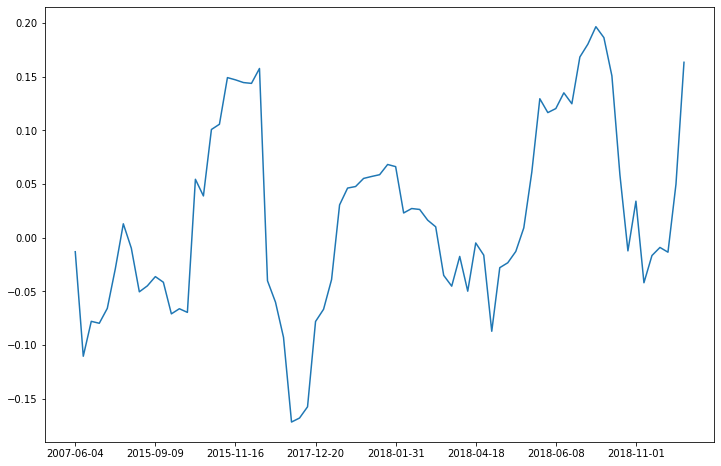

In [69]:


exposure_report.mean_returns.loc[current_daily].sort_values()


exposure_report.total_returns[current_daily]['Utilities'].plot(figsize = (12,8))

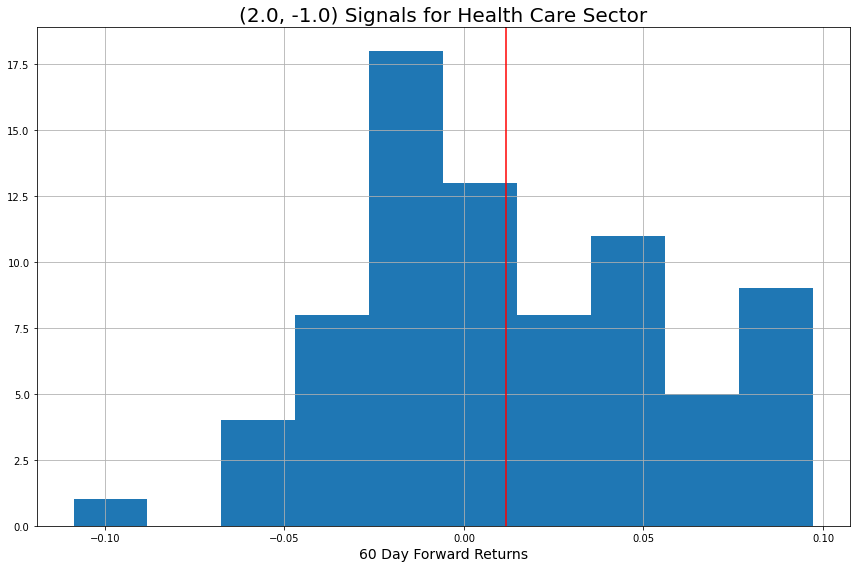

In [65]:



exposure_report.show_return_distribution(0, "Health Care", current_daily)




In [15]:



useful.beta_asset_to_index(sector_df[['Materials', "SP-500"]].pct_change().dropna()[:20].values)




0.7686928983803405

In [42]:

bruh = sector_df[['Materials', "SP-500"]]

mat_vs_sp500 = bruh.values

#np.cov(mat_vs_sp500).shape

ok = np.vstack((mat_vs_sp500[:,0], mat_vs_sp500[:,1]))

#mat_vs_sp500.shape


def beta_asset_to_index(asset_to_index):
    
    asset_to_index = np.vstack((asset_to_index[:,0], asset_to_index[:,1]))
    
    #log_returns = np.log(asset_to_index/asset_to_index.shift()).values
    
    return np.cov(asset_to_index)[0][1] / np.var(asset_to_index)


beta_asset_to_index(bruh)

#useful.beta(bruh)


nan

In [34]:

bruh.cov()



,Materials,SP-500
Materials,8942.002412,89914.310948
SP-500,89914.310948,942358.638962


<BarContainer object of 4 artists>

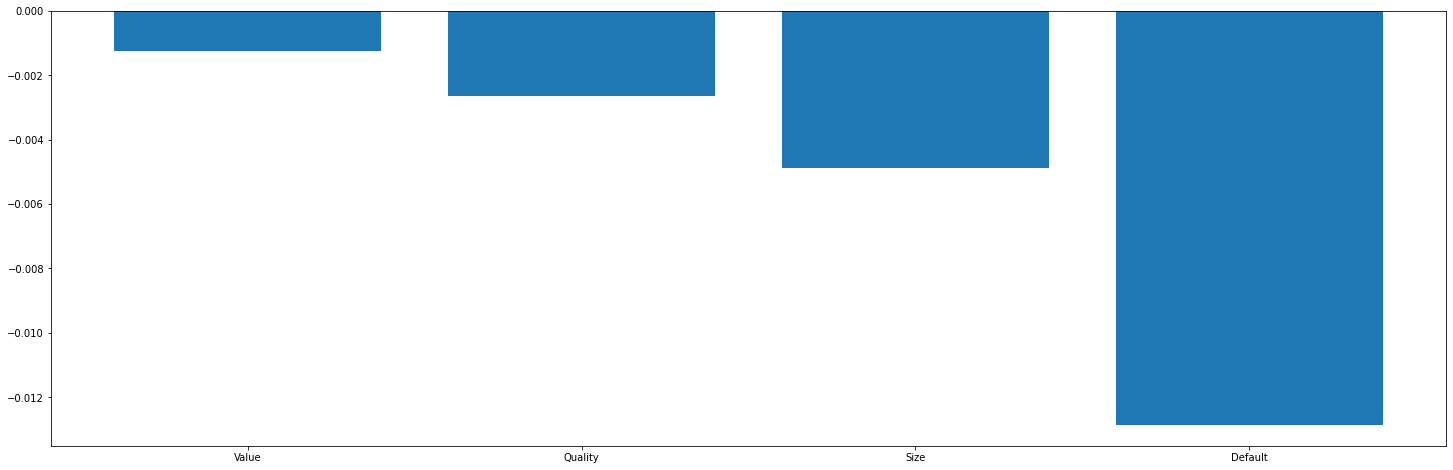

In [7]:


#plt.scatter(exposure_report.mean_returns.Materials.index, exposure_report.mean_returns.Materials)

plt.figure(figsize = (25, 8))
plt.bar(exposure_report.mean_returns_monthly.loc[(4.0, 0.0)].index, exposure_report.mean_returns_monthly.loc[(4.0, 0.0)])



In [9]:


exposure_report.signal_dates_and_returns(True, "Default", (2,-2))



2018-03   -0.007347
2018-05    0.004352
Freq: M, Name: Default, dtype: float64

<AxesSubplot:>

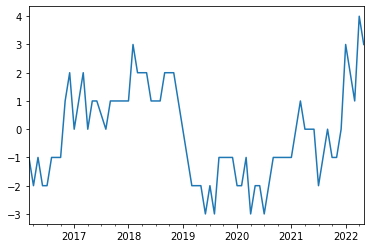

In [24]:


ok = exposure_report.scores['Real Yield'].copy()


round(ok.groupby(pd.PeriodIndex(ok.index, freq="M")).mean(), 0).plot()

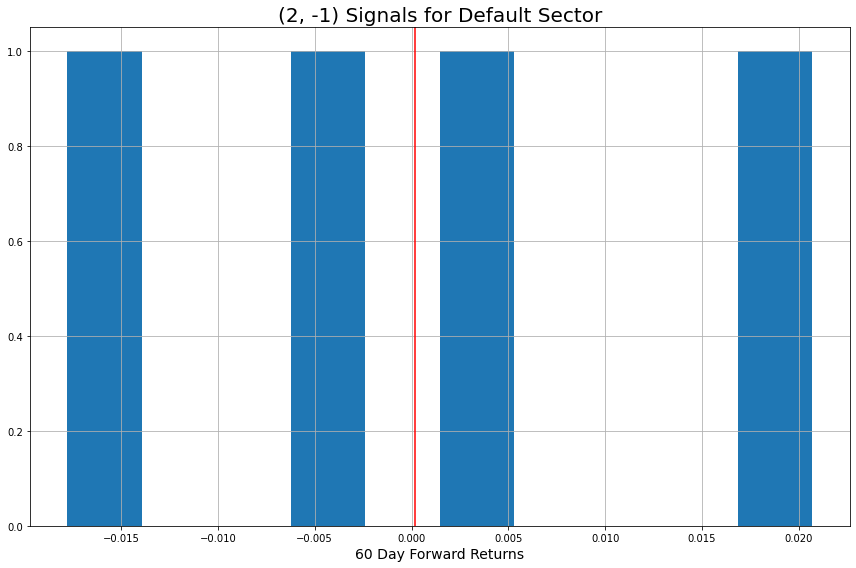

In [17]:


# (4,3)
# 'Information Technology'
exposure_report.show_return_distribution(True, 'Default', (2, -1))

#real_rate.total_returns



In [35]:

both = pd.Series([(r,c) for r,c in zip(exposure_report.scores['Real Yield'].dropna(), exposure_report.scores['Yield Curve'].dropna())], 
                 index = exposure_report.scores['Yield Curve'].dropna().index)

### Combined real rate and yield curve signals ### 
counts = both.value_counts()

### Top 20 combined real rate and yield curve signals ### 
counts[:20]

(-2.0, -1.0)    70
(-1.0, -1.0)    59
(1.0, -2.0)     58
(-1.0, 1.0)     57
(0.0, -2.0)     55
(-1.0, -0.0)    53
(-2.0, -0.0)    44
(3.0, -1.0)     41
(0.0, 2.0)      40
(-1.0, 2.0)     39
(2.0, -1.0)     38
(-0.0, -1.0)    37
(1.0, -1.0)     35
(0.0, 1.0)      35
(-1.0, 3.0)     31
(-0.0, -0.0)    28
(-2.0, 1.0)     28
(-1.0, -2.0)    28
(-3.0, -1.0)    27
(-2.0, 2.0)     27
dtype: int64

In [24]:



exposure_report.total_returns[(2,-2)].Semiconductors.sort_values()


2018-03-09   -0.083471
2018-03-16   -0.076266
2018-03-07   -0.071016
2018-03-19   -0.069862
2018-03-26   -0.045560
2018-03-23   -0.037838
2018-03-06   -0.031694
2017-10-20   -0.025182
2018-03-02   -0.019335
2018-03-05   -0.009328
2017-11-30   -0.007982
2018-02-28    0.000462
2017-10-18    0.004565
2018-10-30    0.026035
2018-10-31    0.029109
2021-06-21    0.030967
2017-05-23    0.045887
Name: Semiconductors, dtype: float64

In [30]:

# Factor Tickers:

# ^SPXQUP


# Value: VLUE
# Quality: QUAL
# Momentum: MTUM
# Size: SIZE
# Default: FIBR




HTTPError: HTTP Error 403: Forbidden

In [16]:


def beta(data_2_columns):
    
    log_returns = np.log(data_2_columns/data_2_columns.shift())
    
    return (log_returns.cov() / log_returns.var())[log_returns.columns[0]].iloc[1]
    
    



In [17]:



beta(real_rate_df[['Materials', 'SP-500']])




0.7246502122767499

In [8]:

mat = c.get_sector_forward_return(c.scores, "Materials")

AttributeError: 'CompareSectors' object has no attribute 'get_sector_forward_return'

In [21]:


yuh['Materials'] == mat['30-Day Forward Return']




2012-01-09    True
2012-01-10    True
2012-01-11    True
2012-01-12    True
2012-01-13    True
              ... 
2022-04-07    True
2022-04-08    True
2022-04-11    True
2022-04-12    True
2022-04-13    True
Length: 2437, dtype: bool

In [7]:

# .drop(columns = ['SP-500'])
c = CompareSectors(cool, 252*2, 30)

rets = c.get_return_means()




['Materials', 'Industrials', 'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology', 'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', 'Aerospace']
Materials
Industrials
Consumer Discretionary
Consumer Staples
Health Care
Financials
Information Technology
Telecommunication Services
Utilities
Real Estate
Energy
Semiconductors
Aerospace


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace
-5,0.000617,-0.030278,0.037210,-0.030313,0.001725,-0.037020,0.027196,0.017230,-0.036913,-0.049653,-0.011154,0.034408,-0.049139
-4,0.015785,0.004656,0.004084,0.000982,-0.001610,-0.001997,0.009602,-0.008703,-0.016870,-0.015350,-0.051065,0.027530,-0.017540
-3,-0.002614,-0.004092,0.008682,-0.002052,-0.004110,-0.005038,0.016778,0.000358,-0.023473,-0.022742,-0.050373,0.016872,-0.022844
-2,0.000078,-0.005131,0.003580,-0.007578,-0.001113,0.004697,0.008820,-0.002957,-0.007394,-0.004183,-0.027857,0.022025,-0.008390
-1,-0.001979,0.001682,-0.001101,-0.010535,-0.004486,0.014369,0.007386,-0.007523,-0.018441,-0.009586,0.010230,0.020499,0.007172
0,-0.005030,-0.002615,0.004167,-0.003534,0.005477,0.002719,0.007727,-0.012287,-0.010024,-0.008719,-0.005225,0.009708,0.005941
1,-0.006908,0.000436,0.006225,-0.000484,0.004490,-0.007563,0.005541,-0.005057,0.003821,-0.000555,-0.005824,0.000128,0.006095
2,-0.006246,-0.000188,0.000731,0.000422,0.005234,-0.012030,0.008704,-0.011417,0.017655,0.010462,-0.006029,0.003556,0.008820
3,-0.005670,-0.007613,-0.000279,0.010308,0.011246,-0.009736,0.002744,-0.006375,0.027451,0.020651,-0.015335,0.008562,0.002098
4,0.005307,0.004287,-0.004293,0.014081,0.015563,-0.006457,-0.009928,-0.026052,0.023247,0.006317,0.023326,0.004056,0.016567


In [51]:


#c.get_sector_forward_return(c.scores, "Materials")['30-Day Forward Return'].plot()


#(-1*(cool['Materials'].diff(-30)/cool['Materials'])).plot()

(cool.iloc[60] / cool.iloc[30]) - 1

Materials                     0.066729
Industrials                   0.102437
Consumer Discretionary        0.096237
Consumer Staples              0.036774
Health Care                   0.023846
Financials                    0.116396
Information Technology        0.066650
Telecommunication Services    0.037410
Utilities                     0.019621
Real Estate                   0.133663
Energy                        0.014165
Semiconductors                0.055306
Aerospace                     0.113164
Real Yield                    0.095890
SP-500                        0.063592
dtype: float64

<BarContainer object of 9 artists>

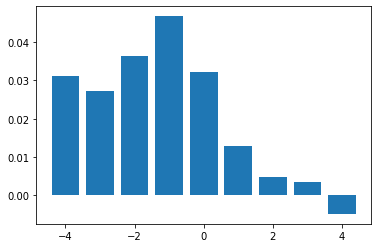

In [65]:
import matplotlib.pyplot as plt

#rets.mean(axis=1)


plt.bar(rets.index, rets['Semiconductors'])



<BarContainer object of 9 artists>

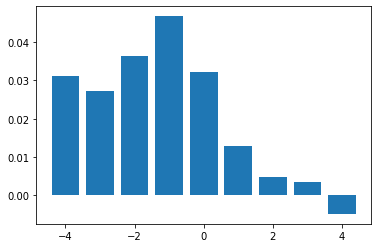

In [77]:


plt.bar(rets.index, rets['Semiconductors'])



In [70]:

semi = c.get_sector_forward_return(c.scores, "Semiconductors")



0.07894736842105263

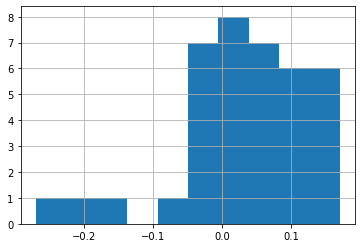

In [80]:



semi['30-Day Forward Return'].loc[semi.Scores == -4].hist()


len(semi['30-Day Forward Return'].loc[semi.Scores == -4])

